# Download dataset

In [2]:
!pip install SoccerNet

  Using cached pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (1.1 kB)
  Using cached Babel-2.14.0-py3-none-any.whl.metadata (1.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 1.7 MB/s eta 0:00:00a 0:00:01
Using cached google_measurement_protocol-1.1.0-py2.py3-none-any.whl (5.9 kB)
Using cached pycocoevalcap-1.2-py3-none-any.whl (104.3 MB)
Using cached scikit_video-1.1.11-py2.py3-none-any.whl (2.3 MB)
Using cached prices-1.1.1-py3-none-any.whl (9.5 kB)
Using cached pycocotools-2.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (426 kB)
Using cached Babel-2.14.0-py3-none-any.whl (11.0 MB)


In [3]:
%cd data/jersey-2023/

from SoccerNet.Downloader import SoccerNetDownloader as SNdl

mySNdl = SNdl(LocalDirectory="./data")
mySNdl.downloadDataTask(task="jersey-2023", split=["train","test","challenge"])

[Errno 2] No such file or directory: 'data/jersey-2023/'
/home/chrenx/eecs545-sn-jersey/data/jersey-2023


In [4]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch

In [11]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
train_dataset = datasets.ImageFolder(
        "testing/tiny-imagenet-200",
        transforms.Compose([
            transforms.RandomResizedCrop(32),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ]))

train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=64, shuffle=True,
        num_workers=1, pin_memory=True)

In [12]:
a = next(iter(train_loader))   
a[0].shape, a[1].shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

# Testing

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import torch
from model.mnist_network import MnistPadding
import torchvision
from torchvision import transforms
from torchvision.io import read_image
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
model = MnistPadding().to(device)  # B, C, 210, 210

ckpt = torch.load("mnist/mnist_model_padding_ckpt_E9.pth")
model.load_state_dict(ckpt['model_state_dict'])


<All keys matched successfully>

In [84]:
transform = transforms.Compose([

    # transforms.CenterCrop(26),
    # transforms.Resize((150,150)),
    # transforms.Resize((250, 250)),
    # transforms.Pad(80),
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
    transforms.Grayscale(1),
    # transforms.RandomRotation(10),      
    # transforms.RandomAffine(5),
    # transforms.RandomPerspective(distortion_scale=0.65, p=0.8),
    # transforms.ElasticTransform(),
    # transforms.GaussianBlur(kernel_size=(3,3)),
    transforms.Resize((64,64)),

    # convert the image to a pytorch tensor
    # transforms.ToTensor(), 

# # normalise the images with mean and std of the dataset
# transforms.Normalize((0.1307,), (0.3081,)) 
])

(<matplotlib.image.AxesImage at 0x795df5cf6590>, torch.Size([3, 92, 36]))

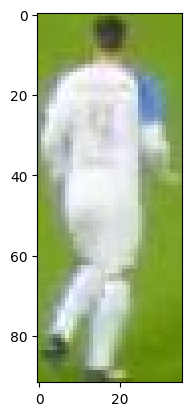

In [87]:
# img_dir = "data/jersey-2023/train/images/6/6_350.jpg"   # 8
# img_dir = "data/jersey-2023/train/images/9/9_51.jpg"    # -1
# img_dir = "data/jersey-2023/train/images/2/2_8.jpg"   #   27
# img_dir = "data/jersey-2023/train/images/6/6_345.jpg"  # 8
# img_dir = "data/jersey-2023/train/images/10/10_26.jpg"  # 3
img_dir = "data/jersey-2023/train/images/20/20_201.jpg"  # 4

ori_img = read_image(img_dir)
plt.imshow(ori_img.permute(1,2,0)), ori_img.shape

(torch.Size([1, 64, 64]), torch.float32, device(type='cuda', index=0))

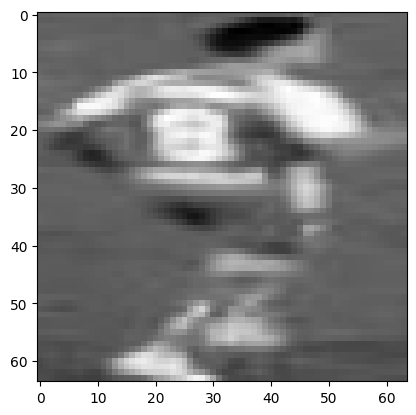

In [81]:
img_dir = "data/jersey-2023/train/images/6/6_350.jpg"   # 8
# img_dir = "data/jersey-2023/train/images/9/9_51.jpg"    # -1
# img_dir = "data/jersey-2023/train/images/2/2_8.jpg"   #   27
# img_dir = "data/jersey-2023/train/images/6/6_345.jpg"  # 8
# img_dir = "data/jersey-2023/train/images/10/10_26.jpg"  # 3
# img_dir = "data/jersey-2023/train/images/20/20_201.jpg"  # 4

ori_img = read_image(img_dir)
img = transform(ori_img)
img = img.float()
plt.imshow(img.permute(1,2,0), cmap='gray')
img = img.to(device)
img.shape, img.dtype, img.device

In [54]:

model.eval()
with torch.no_grad():
    output = model(img.unsqueeze(0))
    pred = output.argmax(dim=1, keepdim=True)
    print(output)
    print(pred)

tensor([[-316.2349, -787.7780, -322.0289, -458.9216, -224.8711, -299.7875,
         -272.8350, -516.2353,    0.0000, -303.0577]], device='cuda:0')
tensor([[8]], device='cuda:0')


In [65]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters: {total_params}")

Number of parameters: 8990410


In [57]:
from model.mnist_network import MnistDistorted28

mnist_distorted28 = MnistDistorted28()

ckpt = torch.load("mnist/mnist_model_distored28_ckpt_E99.pth")
mnist_distorted28.load_state_dict(ckpt['model_state_dict'])
mnist_distorted28.to(device)


MnistDistorted28(
  (conv11): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv12): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv13): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1))
  (conv14): Conv2d(1, 16, kernel_size=(9, 9), stride=(1, 1))
  (conv21): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv22): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv23): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1))
  (conv24): Conv2d(16, 32, kernel_size=(9, 9), stride=(1, 1))
  (conv31): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv32): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv33): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  (conv34): Conv2d(32, 64, kernel_size=(9, 9), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc11): Linear(in_features=7744, out_features=256, bias=True)
 

(torch.Size([1, 28, 28]), torch.float32, device(type='cuda', index=0))

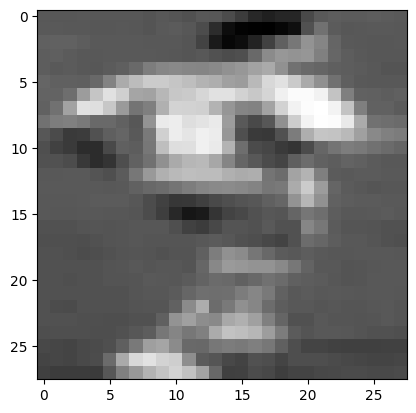

In [66]:
transform = transforms.Compose([

    # transforms.CenterCrop(50),
    # transforms.Resize((150,150)),
    # transforms.Resize((250, 250)),
    # transforms.Pad(80),
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
    transforms.Grayscale(1),
    # transforms.RandomRotation(10),      
    # transforms.RandomAffine(5),
    # transforms.RandomPerspective(distortion_scale=0.65, p=0.8),
    # transforms.ElasticTransform(),
    # transforms.GaussianBlur(kernel_size=(3,3)),
    transforms.Resize((28,28)),

    # convert the image to a pytorch tensor
    # transforms.ToTensor(), 

# # normalise the images with mean and std of the dataset
# transforms.Normalize((0.1307,), (0.3081,)) 
])
img_dir = "data/jersey-2023/train/images/6/6_350.jpg"   # 8
# img_dir = "data/jersey-2023/train/images/9/9_51.jpg"    # -1
# img_dir = "data/jersey-2023/train/images/2/2_8.jpg"   #   27
# img_dir = "data/jersey-2023/train/images/6/6_345.jpg"  # 8
# img_dir = "data/jersey-2023/train/images/10/10_26.jpg"  # 3
# img_dir = "data/jersey-2023/train/images/20/20_201.jpg"  # 4

ori_img = read_image(img_dir)
img = transform(ori_img)
img = img.float()
plt.imshow(img.permute(1,2,0), cmap='gray')
img = img.to(device)
img.shape, img.dtype, img.device

In [67]:
mnist_distorted28.eval()
with torch.no_grad():
    output = mnist_distorted28(img.unsqueeze(0))
    pred = output.argmax(dim=1, keepdim=True)
    print(output)
    print(pred)

tensor([[   0.0000, -271.0093, -628.9890, -735.0399, -619.6136, -664.5666,
         -970.2014, -513.9344, -556.1673, -499.3082]], device='cuda:0')
tensor([[0]], device='cuda:0')


# Testing EfficientNet

In [68]:
import torch
from PIL import Image
import torchvision.transforms as transforms
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')


Using cuda for inference


In [69]:
efficientnet = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_efficientnet_b0', pretrained=True)
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_convnets_processing_utils')

efficientnet.eval().to(device)



Downloading: "https://github.com/NVIDIA/DeepLearningExamples/zipball/torchhub" to /home/chrenx/.cache/torch/hub/torchhub.zip
Downloading: "https://api.ngc.nvidia.com/v2/models/nvidia/efficientnet_b0_pyt_amp/versions/20.12.0/files/nvidia_efficientnet-b0_210412.pth" to /home/chrenx/.cache/torch/hub/checkpoints/nvidia_efficientnet-b0_210412.pth
100.0%
Using cache found in /home/chrenx/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


EfficientNet(
  (stem): Sequential(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (activation): SiLU(inplace=True)
  )
  (layers): Sequential(
    (0): Sequential(
      (block0): MBConvBlock(
        (depsep): Sequential(
          (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (se): SequentialSqueezeAndExcitation(
          (squeeze): Linear(in_features=32, out_features=8, bias=True)
          (expand): Linear(in_features=8, out_features=32, bias=True)
          (activation): SiLU(inplace=True)
          (sigmoid): Sigmoid()
          (mul_a_quantizer): Identity()
          (mul_b_quantizer): Identity()
        )
      

In [75]:
input_img = ori_img.unsqueeze(0).to(device)
input_img = input_img.float()
with torch.no_grad():
    output = torch.nn.functional.softmax(efficientnet(input_img), dim=1)
    
results = utils.pick_n_best(predictions=output, n=5)

# img = Image.open(ori_img)
# img.thumbnail((256,256), Image.ANTIALIAS)
# plt.imshow(img)
# plt.show()
print(results)

sample 0: [('Chihuahua', '100.0%'), ('bucket, pail', '0.0%'), ('Labrador retriever', '0.0%'), ('vizsla, Hungarian pointer', '0.0%'), ('American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier', '0.0%')]
[[('Chihuahua', '100.0%'), ('bucket, pail', '0.0%'), ('Labrador retriever', '0.0%'), ('vizsla, Hungarian pointer', '0.0%'), ('American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier', '0.0%')]]


# Testing yolo model

In [3]:
%cd ~/eecs545-sn-jersey/

/home/chrenx/eecs545-sn-jersey


In [1]:
from ultralytics import YOLO
from argparse import ArgumentParser

pretrained_model_path = "yolo-bb/best-03-25.pt"

# Load a model
# model = YOLO('yolov8s-obb.yaml')  # build a new model from YAML
# model = YOLO('yolov8s-obb.pt')  # load a pretrained model (recommended for training)
model = YOLO(pretrained_model_path)  # build from YAML and transfer weights


In [2]:
img1 = 'yolo-bb/datasets/valid/images/cga_cacique_new_out_1_1_jpg.rf.499d809380b282bc35aa567a329787c2.jpg'
img2 = 'yolo-bb/datasets/valid/images/cga_cacique_new_out_1_6_jpg.rf.07a1595320b0753168da949410943cfd.jpg'
sn_img1 = 'data/jersey-2023/test/images/0/0_1.jpg'
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
# model.predict(img1, save=True, save_txt=True, conf=0.5, classes=classes)
results = model.predict([img1, img2, sn_img1], save=True, conf=0.60)


0: 640x640 162.6ms
1: 640x640 162.6ms
2: 640x640 162.6ms
Speed: 11.1ms preprocess, 162.6ms inference, 5.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/obb/predict2


In [4]:
results[0].obb

ultralytics.engine.results.OBB object with attributes:

cls: tensor([6., 1.])
conf: tensor([0.9383, 0.9287])
data: tensor([[38.4036, 56.2090, 25.7952, 16.5939,  1.5700,  0.9383,  6.0000],
        [22.6396, 56.5604, 25.8356, 13.1163,  1.5712,  0.9287,  1.0000]])
id: None
is_track: False
orig_shape: (184, 92)
shape: torch.Size([2, 7])
xywhr: tensor([[38.4036, 56.2090, 25.7952, 16.5939,  1.5700],
        [22.6396, 56.5604, 25.8356, 13.1163,  1.5712]])
xyxy: tensor([[30.0969, 43.3051, 46.7104, 69.1128],
        [16.0756, 43.6396, 29.2035, 69.4811]])
xyxyxyxy: tensor([[[30.1164, 69.1128],
         [46.7104, 69.1003],
         [46.6908, 43.3051],
         [30.0969, 43.3177]],

        [[16.0756, 69.4752],
         [29.1919, 69.4811],
         [29.2035, 43.6455],
         [16.0873, 43.6396]]])
xyxyxyxyn: tensor([[[0.3274, 0.3756],
         [0.5077, 0.3755],
         [0.5075, 0.2354],
         [0.3271, 0.2354]],

        [[0.1747, 0.3776],
         [0.3173, 0.3776],
         [0.3174, 0.2372],


In [26]:
import torch, heapq
tmp = [23, 13, 25, 199]
q, w, e = heapq.nlargest(3, range(len(tmp)), key=tmp.__getitem__)
x = torch.Tensor([p[0] for p in results[0].obb.xyxyxyxyn[0,:]])
y = torch.Tensor([p[1] for p in results[0].obb.xyxyxyxyn[0,:]])
centroid = ((torch.sum(x) / 4).item(), (torch.sum(y) / 4).item())
results[0].obb.xyxyxyxyn[0,:], centroid, q,w,e, centroid[0]

(tensor([[0.3274, 0.3756],
         [0.5077, 0.3755],
         [0.5075, 0.2354],
         [0.3271, 0.2354]]),
 (0.4174307584762573, 0.3054835796356201),
 3,
 2,
 0,
 0.4174307584762573)

# Code For SoccerNet dataset using YOLOv8

In [28]:
%pwd
%load_ext autoreload
%autoreload 2

In [29]:
import os, json, glob
from ultralytics import YOLO
from argparse import ArgumentParser

# soccernet_train_path = 'data/jersey-2023/train'
# soccernet_test_path = 'data/jersey-2023/test'
# soccernet_challenge_path = 'data/jersey-2023/challenge'

In [30]:
parser = ArgumentParser()
parser.add_argument("--conf", type=float, default=0.6)
parser.add_argument("--mode", type=str, default='train')
parser.add_argument("--challenge", action="store_true")
parser.add_argument("--threshold", type=int, default=5)
parser.add_argument("--input_path", type=str, default='data/jersey-2023/train')
parser.add_argument("--model_path", type=str, default='yolo-bb/best-03-25.pt')
# args = parser.parse_args()
args, unknown = parser.parse_known_args()

model = YOLO(args.model_path)

In [42]:
from predict_soccernet import process_data

process_data(model, args)



当下tracklet参与预测的图片数量:  100
predicted:  tensor([0., 1.])
path:  data/jersey-2023/train/images/1/1_9.jpg
这里3
max:  0
final res:  10
accuracy for train: 0.0%


In [43]:
res = model('data/jersey-2023/train/images/1/1_9.jpg', verbose=False, save=True)

Results saved to runs/obb/predict3


In [44]:
res[0].obb

AttributeError: 'list' object has no attribute 'obb'